## Read EigenValor and Funtion $\lambda$

This code read the Eigenvectors in binary and plot the proyection of the eigenvector in the plane YX

In [1]:
"""
_________________
   LIBRARIES
"""

from struct import *
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
"""
======================
Lectura de Datos 

    ---> EigenValores
======================
"""

## Dirección archivos ##
#Direction_eigenvector='../Bolshoi/Eigenvec_s1_1'
#Direction_eigenvalor='../Bolshoi/Eigen_s1_1'

folder = '../Bolshoi/'
file = 'Eigen_s1_1'


print("Reading eigenvalor file")
f = open("%s%s"%(folder,file), "rb")
#f = open("../Bolshoi/Eigenvec_s1_1", "rb")
dumb = f.read(38)

dumb = f.read(4)
n_x = f.read(4)
n_y = f.read(4)
n_z = f.read(4)
nodes = f.read(4)
x0 = f.read(4)
y0 = f.read(4)
z0 = f.read(4)
dx = f.read(4)
dy = f.read(4)
dz = f.read(4)
dumb = f.read(4)

n_x = (unpack('i', n_x))[0]
n_y = (unpack('i', n_y))[0]
n_z = (unpack('i', n_z))[0]
nodes = (unpack('i', nodes))[0]
dx = (unpack('f', dx))[0]
dy = (unpack('f', dy))[0]
dz = (unpack('f', dz))[0]
x0 = (unpack('f', x0))[0]
y0 = (unpack('f', y0))[0]
z0 = (unpack('f', z0))[0]
print(n_x, n_y, n_z, nodes, dx, dy, dz)

total_nodes = n_x * n_y *n_z
dumb = f.read(4)
array_data = f.read(total_nodes*4)
dumb = f.read(4)
format_s = str(total_nodes)+'f'
#array_data = unpack(format_s, array_data) 
array_data = unpack(format_s, array_data) 
f.close()
array_data  = np.array(array_data)
new_array_data = np.reshape(array_data, (n_x,n_y,n_z), order='F')
print("--------------------\n")


## ¿a que hace referencia el dx,dy y dz ?



Reading eigenvalor file
256 256 256 16777216 976.5625 976.5625 976.5625
--------------------



In [8]:
print(new_array_data[255,255,255])

0.157085880637


In [23]:
"""
=================================
Asignacion datos y generar Grid 
=================================
"""

X=[]
Y=[]
Z=[]


# Z PROYECTADO SOBRE PLANO X,Y

s = 2   #--> slice en z que pretende tomar

for i in range(n_x):
    for j in range(n_x):
        X.append(new_array_data[i,j,s])
        Y.append(new_array_data[j,i,s])
        #Z.append(new_array_data[i,j,s])
    
print(len(X),len(Y))

# COMBIERTE ESTRUCTURA A UNA MATRIZ
X=np.reshape(X,(256,256))
Y=np.reshape(Y,(256,256))
#Z=np.reshape(Z,(256,256))

# GENERA GRID
posx=np.arange(0,256,1)
posy=np.arange(0,256,1)
#posz=np.arange(0,256,1)

Px,Py=np.meshgrid(posx,posy)



print("estructure ready")


65536 65536
estructure ready


<IPython.core.display.Javascript object>


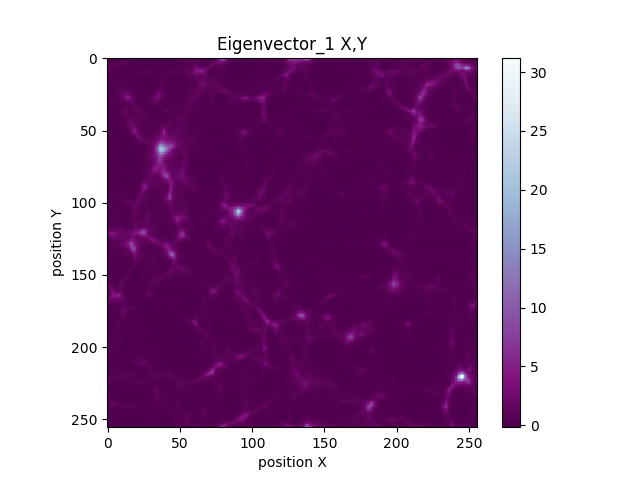

In [38]:
"""
=================================
Graficas
=================================
"""

plt.figure()
#plt.plot(Px,Py)
plt.imshow(X,cmap=plt.cm.BuPu_r)
#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)
plt.colorbar()

plt.title("Eigenvector_1 X,Y")
plt.xlabel("position X")
plt.ylabel("position Y")




In [83]:
"""
========================
Funcion para obtener el 
EigenValor y EigenVector
========================

    En esta funcion se entrega las coordenadas r(x,y,z) 
    correspondiente a una celda, y retorna el EigenVector
    que se encuentra en la celda.
    
    input=r
    return = eigen_valor

"""
r=[]  #---> vector de tres coordenadas
eigen=[]

def Eigen_val(r):
    """
    Esta funcion retorna el valor del auntoValor
    correspondiente a las coordenadas r(x,y,z)
    """
    
    
    #new_array_data[[i,j,k],n_x,n_y,n_z] ---> retorna EigenVec
    long_box= 256. #longitud caja
    
    dl = n_x/long_box #tamaño de cada celda = numero_celdas/long_caja
    
    i=np.int(r[0]*dl)
    j=np.int(r[1]*dl)
    k=np.int(r[2]*dl)

    eigen_vec_r = new_array_data[i,j,k]
    
    #return i,j,k, dl
    #return r[0],r[1],r[2]
    return eigen_vec_r


a = Eigen_val(np.array([190,60,56]))

#print(new_array_data[10,0,110])
print("eigen_val",a)




eigen_val 2.57860851288


In [70]:
Eigen_val([1,2,3])[0]

0.15019427239894867

In [15]:
0.314949989319

0.314949989319

4) Con la anterior función, cree un archivo ascii donde guarde la información de todos los autovalores y autovectores del catálogo de Subhalos de la simulación. Esto quiere decir que por cada subhalo, debe haber 3 autovalores y 3 autovectores. Esta información será últil luego para calcular correlaciones de entorno.


In [63]:
np.reshape?

In [110]:
"""
======================================
Escritura en ascii de los autovalores
=====================================
"""

enviroment=[]
pos_x = []
pos_y = []
pos_z = []
new_data = []

for i in range(10):
    for j in range(10):
        for k in range(10):
                        
            enviroment.append(Eigen_val(np.array([i,j,k])))
            pos_x.append(i)
            pos_y.append(j)
            pos_z.append(k)
            #new_enviroment = np.reshape(enviroment,(10,10,10))
            
            
np.savetxt("eigen.dat", np.column_stack((enviroment, pos_x, pos_y, pos_z)) )

print(len(enviroment))

1000


In [92]:
len(enviroment)

1